**Authors:** Gabriel Sposito and Thomas Frentzel

**LSTM**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dropout, LSTM, Dense
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [ ]:
base = pd.read_csv('Intel 5Y.csv')
base.head()

,Date,Close/Last,Volume,Open,High,Low
0,10/08/2024,$23.32,58650460,$22.25,$23.42,$22.045
1,10/07/2024,$22.38,54928670,$22.40,$22.65,$22.0209
2,10/04/2024,$22.59,49966930,$22.70,$22.91,$22.30
3,10/03/2024,$22.26,49565930,$22.14,$22.73,$21.65
4,10/02/2024,$22.39,59033900,$22.67,$23.0668,$22.35


In [ ]:
# Removing $
base['Close/Last'] = base['Close/Last'].str.replace('$', '')
base['Open'] = base['Open'].str.replace('$', '')
base['High'] = base['High'].str.replace('$', '')
base['Low'] = base['Low'].str.replace('$', '')

# Converting str to float
base['Close/Last'] = base['Close/Last'].astype(float)
base['Open'] = base['Open'].astype(float)
base['High'] = base['High'].astype(float)
base['Low'] = base['Low'].astype(float)

In [ ]:
#Removing nule results
base.dropna()

,Date,Close/Last,Volume,Open,High,Low
0,10/08/2024,23.32,58650460,22.25,23.4200,22.0450
1,10/07/2024,22.38,54928670,22.40,22.6500,22.0209
2,10/04/2024,22.59,49966930,22.70,22.9100,22.3000
3,10/03/2024,22.26,49565930,22.14,22.7300,21.6500
4,10/02/2024,22.39,59033900,22.67,23.0668,22.3500
...,...,...,...,...,...,...
1253,10/15/2019,52.65,18970760,51.93,53.0700,51.8300
1254,10/14/2019,51.64,16425530,51.90,51.9500,51.4400
1255,10/11/2019,52.09,24167110,52.00,52.7900,51.8200
1256,10/10/2019,51.11,14611660,50.41,51.7750,50.4000


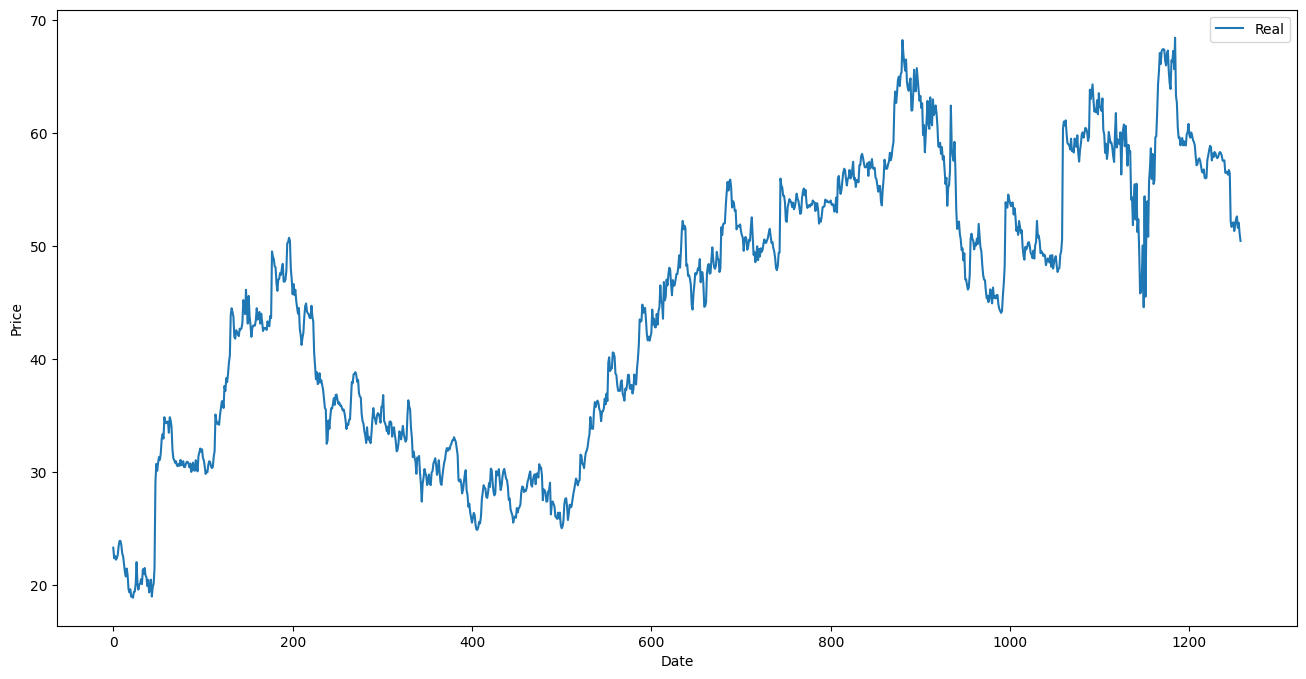

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(base['Close/Last'], label='Real')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

In [ ]:
# Normalizing the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(np.array(base['Close/Last']).reshape(-1, 1))

In [ ]:
window_size = 10
forecasters = []
real_value = []
for i in range(window_size, len(base)):
    forecasters.append(scaled_data[i - window_size:i, 0])
    real_value.append(scaled_data[i, 0])

forecasters, real_value = np.array(forecasters), np.array(real_value)
forecasters = np.reshape(forecasters, (forecasters.shape[0], forecasters.shape[1], 1))

In [ ]:
# Separating data between training and testing
X_train, X_test, y_train, y_test = train_test_split(forecasters, real_value, test_size=0.3, shuffle=False)

In [ ]:
# Creating the LSTM model

lstm = Sequential()
lstm.add(LSTM(units=50, return_sequences=True, input_shape=(forecasters.shape[1], 1)))
lstm.add(Dropout(0.3))
lstm.add(LSTM(units=50, return_sequences=True))
lstm.add(Dropout(0.3))
lstm.add(LSTM(units=50))
lstm.add(Dropout(0.3))
lstm.add(Dense(units=1))
lstm.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history = lstm.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.0947 - mean_absolute_error: 0.2442 - val_loss: 0.0357 - val_mean_absolute_error: 0.1751
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0105 - mean_absolute_error: 0.0828 - val_loss: 0.0044 - val_mean_absolute_error: 0.0488
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0060 - mean_absolute_error: 0.0591 - val_loss: 0.0105 - val_mean_absolute_error: 0.0897
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0062 - mean_absolute_error: 0.0592 - val_loss: 0.0045 - val_mean_absolute_error: 0.0467
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0061 - mean_absolute_error: 0.0598 - val_loss: 0.0043 - val_mean_absolute_error: 0.0454
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0054 - mean_absolute_error: 0.0558 - val_loss: 0.0042 - val_mean_absolute_error: 0.0448
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0050 - mean_absolute_error: 0.0534 - v

In [ ]:
test_predictions = lstm.predict(X_test)
test_predictions = scaler.inverse_transform(test_predictions)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


In [ ]:
# Transforming test values ​​back to original values
y_orig_test = scaler.inverse_transform(y_test.reshape(-1, 1))

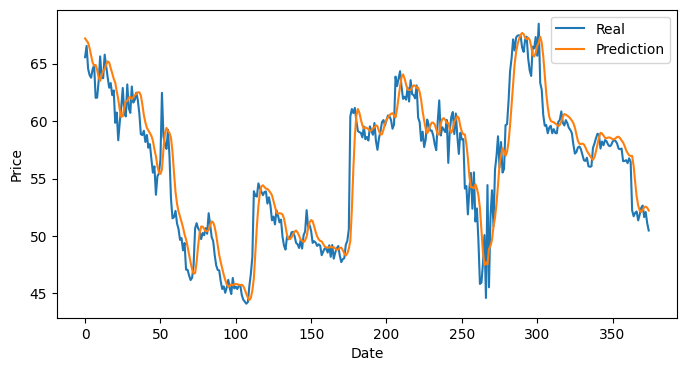

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(range(len(y_orig_test)), y_orig_test, label='Real')
plt.plot(range(len(test_predictions)), test_predictions, label='Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
#R2 Score
r2 = r2_score(y_orig_test, test_predictions)
print(f'R2 Score: {r2}')

#RMSE
rmse = np.sqrt(np.mean((y_orig_test - test_predictions) ** 2))
print(f'RMSE: {rmse}')

R2 Score: 0.8813505409159793
RMSE: 2.0409418657296934


**ARIMA**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt

In [ ]:
base_A = pd.read_csv('Intel 5Y.csv')
base_A.head()

,Date,Close/Last,Volume,Open,High,Low
0,10/08/2024,$23.32,58650460,$22.25,$23.42,$22.045
1,10/07/2024,$22.38,54928670,$22.40,$22.65,$22.0209
2,10/04/2024,$22.59,49966930,$22.70,$22.91,$22.30
3,10/03/2024,$22.26,49565930,$22.14,$22.73,$21.65
4,10/02/2024,$22.39,59033900,$22.67,$23.0668,$22.35


In [ ]:
base_A.dtypes

,0
Date,object
Close/Last,object
Volume,int64
Open,object
High,object
Low,object


In [ ]:
# Removing $
base_A['Close/Last'] = base_A['Close/Last'].str.replace('$', '')
base_A['Open'] = base_A['Open'].str.replace('$', '')
base_A['High'] = base_A['High'].str.replace('$', '')
base_A['Low'] = base_A['Low'].str.replace('$', '')

# Converting str to float
base_A['Close/Last'] = base_A['Close/Last'].astype(float)
base_A['Open'] = base_A['Open'].astype(float)
base_A['High'] = base_A['High'].astype(float)
base_A['Low'] = base_A['Low'].astype(float)

In [ ]:
# Converting indicator values ​​to numeric values ​​and removing NaN values
base_A = base_A.replace([np.inf, -np.inf], np.nan)
base_A = base_A.dropna()

In [ ]:
base_A.head()

,Date,Close/Last,Volume,Open,High,Low
0,10/08/2024,23.32,58650460,22.25,23.4200,22.0450
1,10/07/2024,22.38,54928670,22.40,22.6500,22.0209
2,10/04/2024,22.59,49966930,22.70,22.9100,22.3000
3,10/03/2024,22.26,49565930,22.14,22.7300,21.6500
4,10/02/2024,22.39,59033900,22.67,23.0668,22.3500


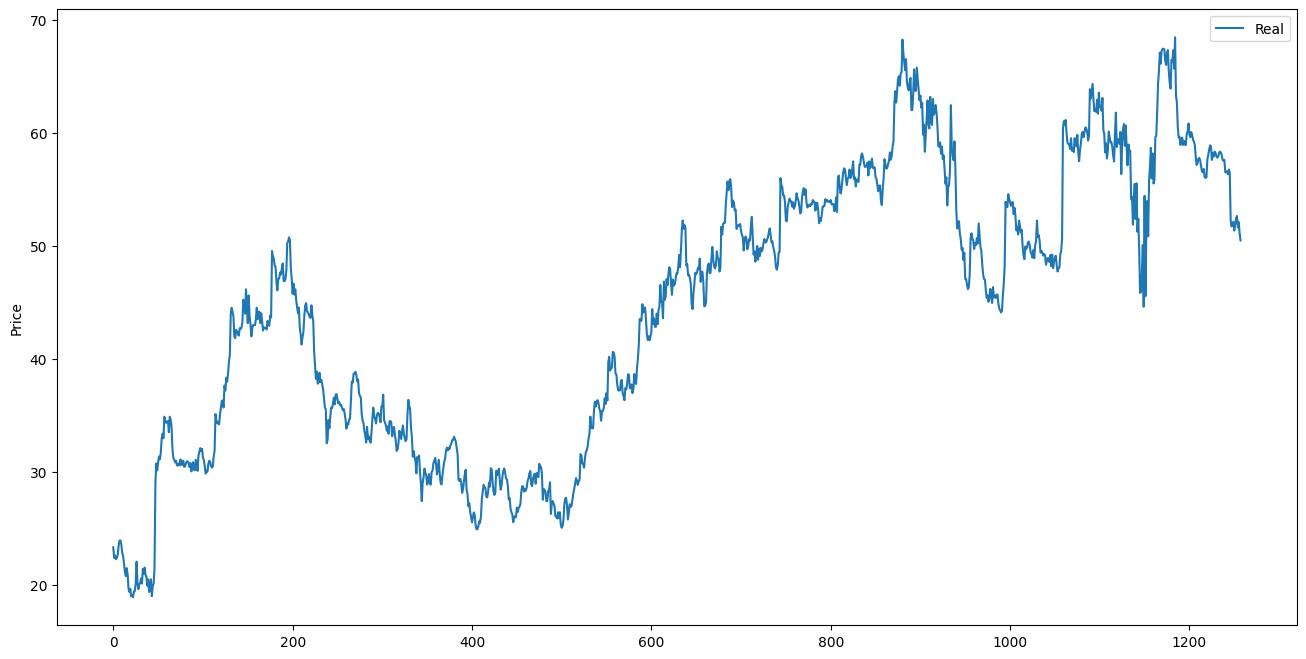

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(base_A['Close/Last'], label='Real')
plt.ylabel('Price')
plt.legend()

In [ ]:
# Addfuller for CCI
result = adfuller(base_A['Close/Last'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -2.070452361777434
p-value: 0.25656059675370146


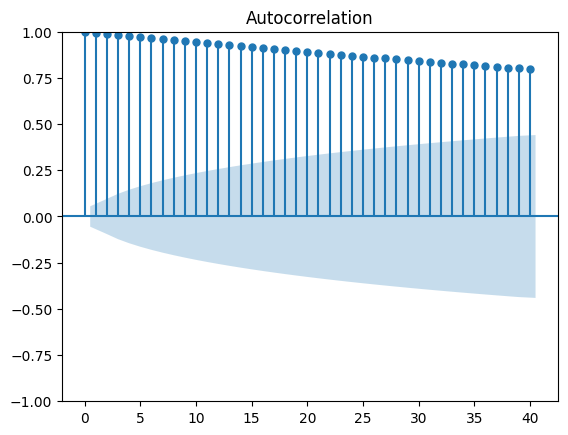

In [ ]:
plot_acf(base_A['Close/Last'], lags=40)
plt.show()

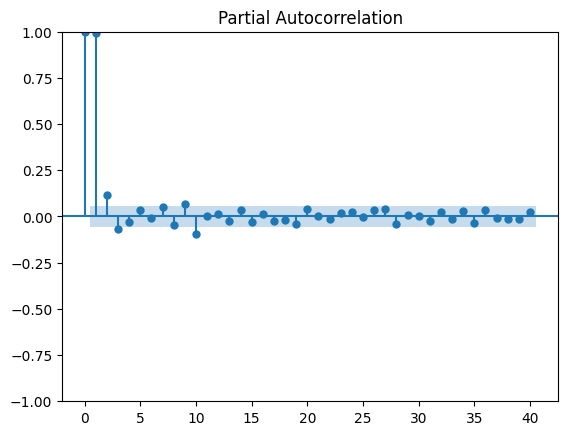

In [ ]:
plot_pacf(base_A['Close/Last'], lags=40)
plt.show()

In [ ]:
X = base_A['Close/Last'].values
size = int(len(X) * 0.70)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
forecasts = list()

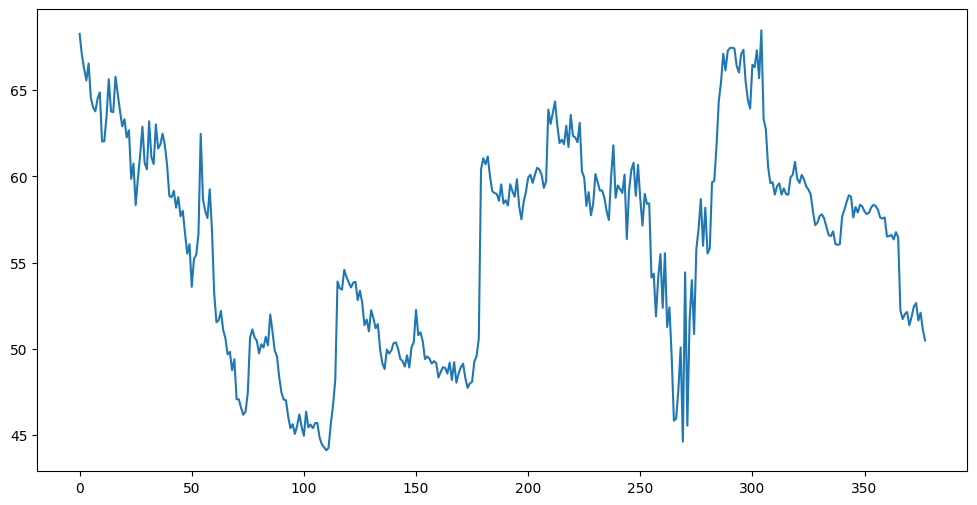

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(test)
plt.show()

In [ ]:
for t in range(len(test)):
    model = ARIMA(history, order=(2, 1, 1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    forecasts.append(yhat)
    obs = test[t]
    history.append(obs)
    print(f'Expected={yhat}, Observed={obs}')

Expected=65.45280879328251, Observed=68.26
Expected=68.30764140716471, Observed=67.05
Expected=67.16232312751899, Observed=66.25
Expected=66.17461860661244, Observed=65.56
Expected=65.52736449892612, Observed=66.54
Expected=66.52741275047816, Observed=64.55
Expected=64.57621510986887, Observed=64.0
Expected=63.90275306413135, Observed=63.77
Expected=63.75886460925997, Observed=64.5
Expected=64.49984583715644, Observed=64.87
Expected=64.90650413680133, Observed=62.02
Expected=61.999769254407525, Observed=62.04
Expected=61.92676756213835, Observed=63.48
Expected=63.51316729378998, Observed=65.63
Expected=65.7598406743736, Observed=63.76


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Expected=63.80092622865713, Observed=63.725
Expected=63.649966634029795, Observed=65.78
Expected=65.81289045383694, Observed=64.78
Expected=64.83932583199095, Observed=63.79
Expected=63.74875831674944, Observed=62.9
Expected=62.87714106783256, Observed=63.31
Expected=63.295802498236974, Observed=62.25
Expected=62.314032184529836, Observed=62.67
Expected=62.59076037924862, Observed=59.85
Expected=59.90646156054258, Observed=60.74
Expected=60.639553872210406, Observed=58.33
Expected=58.396003720327265, Observed=59.9
Expected=59.7694150343446, Observed=61.24
Expected=61.38847315408031, Observed=62.88
Expected=62.749239384044124, Observed=60.78
Expected=60.846116099411574, Observed=60.4
Expected=60.29881511641836, Observed=63.19
Expected=63.20198489630942, Observed=61.12
Expected=61.21525478319333, Observed=60.71
Expected=60.63268855963328, Observed=63.01
Expected=62.998210045540254, Observed=61.61
Expected=61.748861860119476, Observed=61.85
Expected=61.711436237969124, Observed=62.47
Expe

In [ ]:
#RMSE
rmse = sqrt(mean_squared_error(test, forecasts))
print(f'RMSE: {rmse}')

#R2 Score
r2 = r2_score(test, forecasts)
print(f'R2 Score: {r2}')

RMSE: 1.63003094747376
R2 Score: 0.9258222137098127


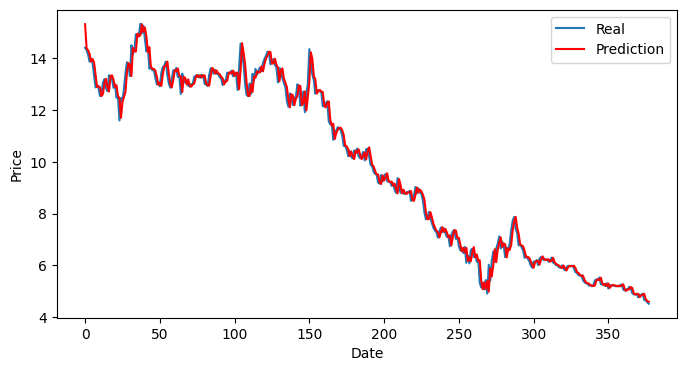

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(range(len(test)), test, label='Real')
plt.plot(range(len(forecasts)), forecasts, label='Prediction', color = 'red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()